## AND / OR / XOR 이해하기 with keras

In [1]:
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Dropout, Activation
from keras.optimizers import Adam, SGD
import numpy as np

In [2]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [0],
          [0],
          [1]]
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

In [3]:
model = Sequential()
model.add(InputLayer(2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [4]:
#optimizer = Adam(lr=0.1) # learning rate
optimizer = SGD(lr=0.1) # learning rate
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=optimizer)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


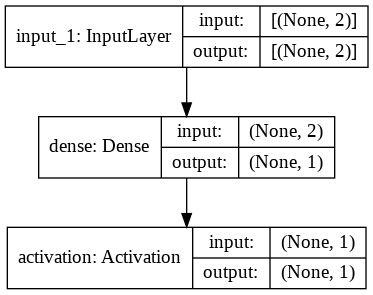

In [6]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [7]:
history = model.fit(x_data, y_data, batch_size=1, epochs=500)

Epoch 1/500
4/4 [==============================] - 12s 3ms/step - loss: 0.8906 - accuracy: 0.3667
Epoch 2/500
4/4 [==============================] - 0s 2ms/step - loss: 0.5831 - accuracy: 0.7333
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 0.7799 - accuracy: 0.5667
Epoch 4/500
4/4 [==============================] - 0s 2ms/step - loss: 0.7435 - accuracy: 0.3667
Epoch 5/500
4/4 [==============================] - 0s 2ms/step - loss: 0.5766 - accuracy: 0.6333
Epoch 6/500
4/4 [==============================] - 0s 2ms/step - loss: 0.5942 - accuracy: 0.5667
Epoch 7/500
4/4 [==============================] - 0s 2ms/step - loss: 0.5851 - accuracy: 0.5667
Epoch 8/500
4/4 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.4333
Epoch 9/500
4/4 [==============================] - 0s 2ms/step - loss: 0.5943 - accuracy: 0.6333
Epoch 10/500
4/4 [==============================] - 0s 2ms/step - loss: 0.7119 - accuracy: 0.3667
Epoch 11/500
4/4 [==========

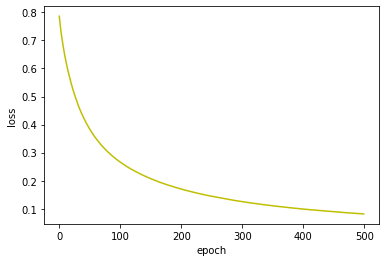

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'y', label='train loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

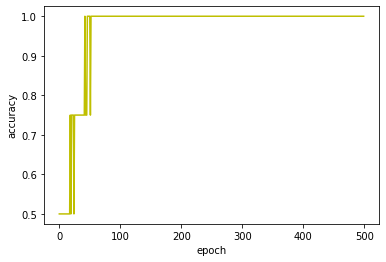

In [9]:
plt.plot(history.history['accuracy'], 'y', label='train acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [10]:
hypothesis = model.predict_proba(x_data)
print(hypothesis)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[[0.00137627]
 [0.0894486 ]
 [0.08937716]
 [0.87494195]]


In [11]:
predicted = hypothesis > 0.5
print(predicted)

[[False]
 [False]
 [False]
 [ True]]
